In [1]:
from jupyter_jsmol.pymatgen import quick_view
from pymatgen.ext.matproj import MPRester
from pymatgen.electronic_structure.core import Spin
from pymatgen.electronic_structure.plotter import BSPlotter
from pymatgen.electronic_structure.bandstructure import BandStructure
import matplotlib.pyplot as plt
%matplotlib inline

Téléchargement de la structure de bande du matériau attribué : $Yb I_2$

In [2]:
with MPRester("vLhgJsB0A5VPXcw8") as m:

    # Structure for material id
    bs = m.get_bandstructure_by_material_id("mp-570418")

Déterminons la bande interdite
Dans le plot interactif sur le Materials Project pour ce matériau, \
La dernière bande de valence est notée (10 1), \
Tandis que la première bande de conduction, qui est complètement vide, est notée (11 1).

In [3]:
if (bs.get_band_gap()['direct'] == True) : 
    print("La bande interdite est directe.")
else :
    print("La bande interdite est indirecte.")
print("La valeur du gap énergétique est de : {} eV.".format(bs.get_band_gap()['energy']))
print("Le matériau est donc un isolant.")
print("La transition a lieu en {}".format(bs.get_band_gap()['transition'][1:]))

La bande interdite est indirecte.
La valeur du gap énergétique est de : 4.0076 eV.
Le matériau est donc un isolant.
La transition a lieu en Gamma-M


Deux premières représentations (entre -1 et 6 eV) de la structure de bande, dans l'ordre : 
1. Une interpolation linéaire de la structure de bande permettant une première analyse qualitative de la dispersion selon les différentes directions
2. La structure de bande originale

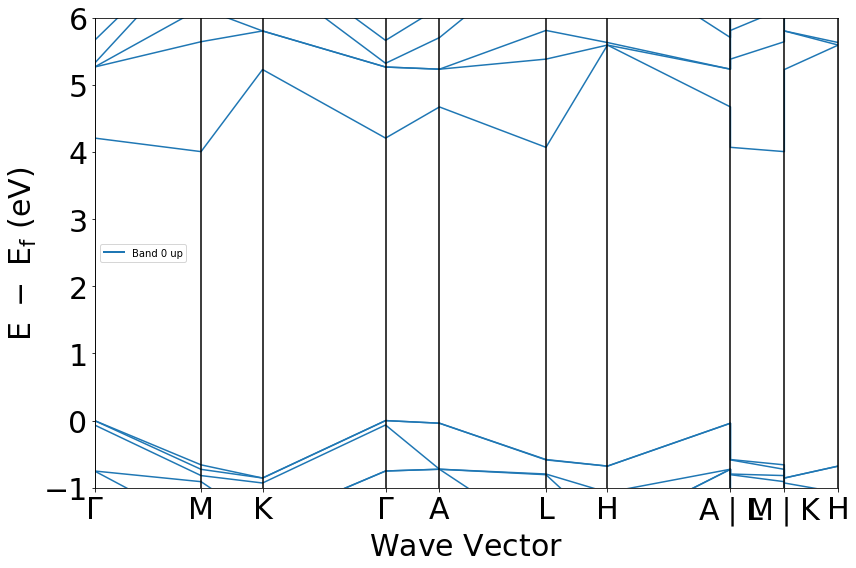

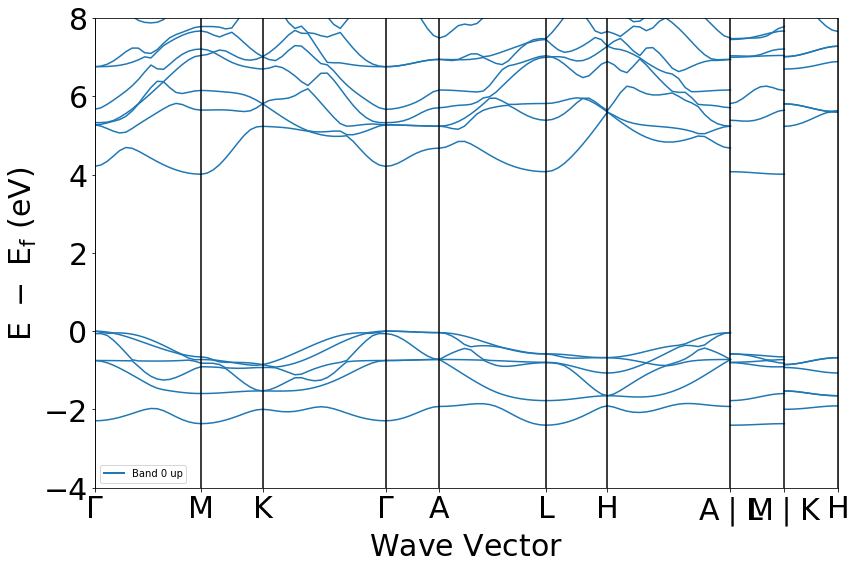

In [4]:
plot1 = BSPlotter(bs)
plot1.get_plot(ylim=(-1, 6),smooth = True,smooth_np = 2)
plot1.show()

Calcul des dispersions maximales et minimales dans la bande de valence et dans celle de conduction

In [7]:
data = plot1.bs_plot_data()

#Distances le long des directions
écarts = []
for i in range(len(data['distances'])):
    écarts.append(data['distances'][i][-1]-data['distances'][i][0])


#VALENCE
deltas_énergie_valence = []
for i in range (len(data['energy'][str(Spin.up)])):
    deltas_énergie_valence.append(data['energy'][str(Spin.up)][i][10][-1]-data['energy'][str(Spin.up)][i][10][0])

dispersions_valence = []
for i in range(len(data['distances'])):
    dispersions_valence.append(abs(deltas_énergie_valence[i]/écarts[i]))

print("La pente maximale dans la bande de valence vaut :", max(dispersions_valence), "ce qui correspond a une dispersion maximale, dans la",dispersions_valence.index(max(dispersions_valence))+1,"ème direction du graphique, à savoir : K - \u0393 ")
print("La pente minimale dans la bande de valence vaut :", min(dispersions_valence), "ce qui correspond a une dispersion minimale, dans la",dispersions_valence.index(min(dispersions_valence))+1,"ème direction du graphique, à savoir : \u0393 - A ")    

#CONDUCTION
deltas_énergie_conduction = []
for i in range (len(data['energy'][str(Spin.up)])):
    deltas_énergie_conduction.append(data['energy'][str(Spin.up)][i][11][-1]-data['energy'][str(Spin.up)][i][11][0])

dispersions_conduction = []
for i in range(len(data['distances'])):
    dispersions_conduction.append(abs(deltas_énergie_conduction[i]/écarts[i]))
    
print("========================================================")
print("La pente maximale dans la bande de conduction vaut :", max(dispersions_conduction), "ce qui correspond a une dispersion maximale, dans la",dispersions_conduction.index(max(dispersions_conduction))+1,"ème direction du graphique, à savoir : L - H ")
print("La pente minimale dans la bande de conduction vaut :", min(dispersions_conduction), "ce qui correspond a une dispersion minimale, dans la",dispersions_conduction.index(min(dispersions_conduction))+1,"ème direction du graphique, à savoir : A|L - M|K ")    

La pente maximale dans la bande de valence vaut : 0.9185034816205087 ce qui correspond a une dispersion maximale, dans la 3 ème direction du graphique, à savoir : K - Γ 
La pente minimale dans la bande de valence vaut : 0.09555161381504683 ce qui correspond a une dispersion minimale, dans la 4 ème direction du graphique, à savoir : Γ - A 
La pente maximale dans la bande de conduction vaut : 3.270465043257115 ce qui correspond a une dispersion maximale, dans la 6 ème direction du graphique, à savoir : L - H 
La pente minimale dans la bande de conduction vaut : 0.1565576441738852 ce qui correspond a une dispersion minimale, dans la 8 ème direction du graphique, à savoir : A|L - M|K 


Graphe de la structure de bandes avec dispersions maximales et minimales mises en évidence\
\
Dispersion maximale de la bande de valence en vert\
Dispersion minimale de la bande de valence en rouge\
\
Dispersion maximale de la bande de conduction en bleu\
Dispersion minimale de la bande de conduction en mauve

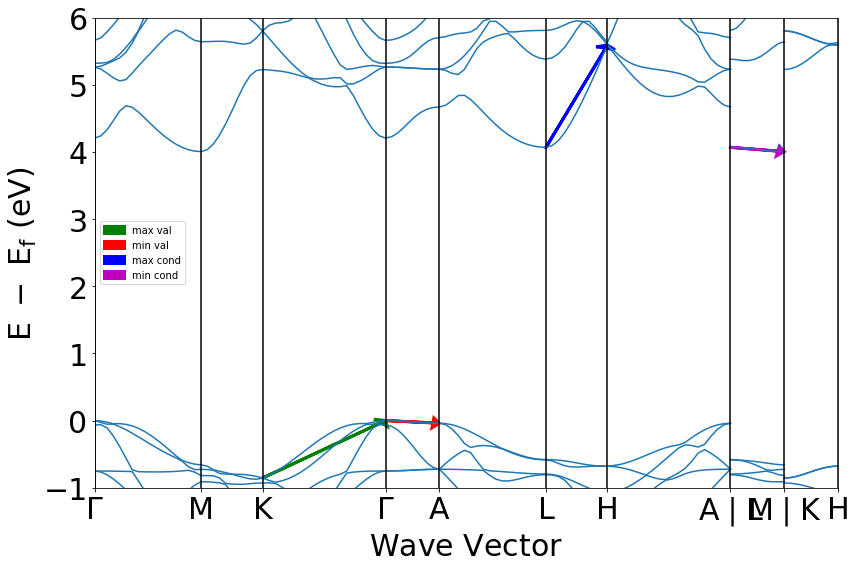

In [12]:
plot2 = BSPlotter(bs)
plot2.get_plot(ylim=(-1, 6))

plt.arrow(data['distances'][2][0], data['energy'][str(Spin.up)][2][10][0],data['distances'][2][-1]-data['distances'][2][0],data['energy'][str(Spin.up)][2][10][-1]-data['energy'][str(Spin.up)][2][10][0], label = "max val", head_width=0.15, head_length=0.05, linewidth=3, color='g', length_includes_head=True)
plt.arrow(data['distances'][3][0], data['energy'][str(Spin.up)][3][10][0],data['distances'][3][-1]-data['distances'][3][0],data['energy'][str(Spin.up)][3][10][-1]-data['energy'][str(Spin.up)][3][10][0], label = "min val", head_width=0.15, head_length=0.05, linewidth=3, color='r', length_includes_head=True)
plt.arrow(data['distances'][5][0], data['energy'][str(Spin.up)][5][11][0],data['distances'][5][-1]-data['distances'][5][0],data['energy'][str(Spin.up)][5][11][-1]-data['energy'][str(Spin.up)][5][11][0], label = "max cond", head_width=0.15, head_length=0.05, linewidth=3, color='b', length_includes_head=True)
plt.arrow(data['distances'][7][0], data['energy'][str(Spin.up)][7][11][0],data['distances'][7][-1]-data['distances'][7][0],data['energy'][str(Spin.up)][7][11][-1]-data['energy'][str(Spin.up)][7][11][0], label = "min cond", head_width=0.15, head_length=0.05, linewidth=3, color='m', length_includes_head=True)

plt.legend()
plt.show()

Avant de calculer les masses effectives, on note que sur la structure de bandes il y a deux maximums dans la bande de valence et deux minimums dans la bande de conduction. \
Je choisis de ne traiter que les premiers maximum et minimum (à savoir sur la direction $\Gamma$ - M) \
La méthode consiste à prendre deux points d'une parabole pour en obtenir l'équation $f(k) = a(k-b)^2 + c$ (le sommet et un point quelconque) \
Nous calculons ensuite la dérivée seconde selon k de cette parabole ($f''(k) = 2a$) pour finalement trouver la masse effective par la relation suivante : 
$$m^* = \hbar^2(\frac{\partial^2f(k)}{\partial^2k})^{-1}$$

In [14]:
h_barre = 1.054571818*10**(-34)
eV = 1.602176634*10**(-19)
Angström = 10**(-10)
distances = data['distances']
énergies = data['energy'][str(Spin.up)]

Calcul de la masse effective au sommet de la dernière bande de valence, \
en supposant une dispersion parabolique

In [30]:
print("Coordonnées maximum : (",distances[0][0],",",énergies[0][10][0],") , en \u0393")
print("Coordonnées point quelconque : (",distances[1][0],",",énergies[1][10][0],") , en M")
print("\n")
print("On obtient l'équation de la parabole :")
a=énergies[1][10][0]/(distances[1][0])**2
print("f(k) = ",a,"*(k^2)")
print("\n")
print("Ainsi que sa dérivée seconde : ")
print("f''(k) =",2*a,"[eV.Angström^2] =",2*a*Angström**2*eV,"[J.m^2]")
print("\n")
print("A l'aide de la dernière formule, nous obtenons la masse effective :")
print("m* =",h_barre**2/(2*a*Angström**2*eV),"[kg]")

Coordonnées maximum : ( 0.0 , 0.0 ) , en Γ
Coordonnées point quelconque : ( 0.8069044346257649 , -0.6595 ) , en M


On obtient l'équation de la parabole :
f(k) =  -1.0129093855644469 *(k^2)


Ainsi que sa dérivée seconde : 
f''(k) = -2.0258187711288937 [eV.Angström^2] = -3.2457194998213076e-39 [J.m^2]


A l'aide de la dernière formule, nous obtenons la masse effective :
m* = -3.426425849125449e-30 [kg]


Calcul de la masse effective à la base de la première bande de conduction, \
en supposant une dispersion parabolique

In [35]:
print("Coordonnées minimum : (",distances[1][0],",",énergies[1][11][0],") , en M")
print("Coordonnées point quelconque : (",distances[2][0],",",énergies[2][11][0],") , en K")
print("\n")
print("On obtient l'équation de la parabole :")
a=(énergies[2][11][0]-énergies[1][11][0])/(distances[2][0]-distances[1][0])**2
print("f(k) = ",a,"*(k -",distances[1][0],")^2 +",énergies[1][11][0])
print("\n")
print("Ainsi que sa dérivée seconde : ")
print("f''(k) =",2*a,"[eV.Angström^2] =",2*a*Angström**2*eV,"[J.m^2]")
print("\n")
print("A l'aide de la dernière formule, nous obtenons la masse effective :")
print("m* =",h_barre**2/(2*a*Angström**2*eV),"[kg]")

Coordonnées minimum : ( 0.8069044346257649 , 4.0076 ) , en M
Coordonnées point quelconque : ( 1.2727709031089824 , 5.2308 ) , en K


On obtient l'équation de la parabole :
f(k) =  5.636046497605734 *(k - 0.8069044346257649 )^2 + 4.0076


Ainsi que sa dérivée seconde : 
f''(k) = 11.272092995211468 [eV.Angström^2] = 1.805988401320289e-38 [J.m^2]


A l'aide de la dernière formule, nous obtenons la masse effective :
m* = 6.1579671193170195e-31 [kg]
